In [80]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [81]:
# loading the dataset
dataset = pd.read_csv('assets/dataset/SuperMarketSales.csv', parse_dates=['Date'], dayfirst=True)
dataset

,Store,Date,Temperature,Fuel_Price,CPI,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,1643690.9
1,1,2010-02-12,38.51,2.548,211.242170,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,1554806.68
...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,713173.95
6431,45,2012-10-05,64.89,3.985,192.170412,733455.07
6432,45,2012-10-12,54.47,4.000,192.327265,734464.36
6433,45,2012-10-19,56.47,3.969,192.330854,718125.53


In [82]:
#Deal with missing values
print(dataset.isna().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Weekly_Sales    0
dtype: int64


In [83]:
#Drop the rows that contain missing values
dataset.dropna(how='any',inplace=True)

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   CPI           6435 non-null   float64       
 5   Weekly_Sales  6435 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 301.8+ KB


In [85]:
dataset.describe()

,Store,Temperature,Fuel_Price,CPI
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,60.663782,3.358607,171.578394
std,12.988182,18.444933,0.459020,39.356712
min,1.000000,-2.060000,2.472000,126.064000
25%,12.000000,47.460000,2.933000,131.735000
50%,23.000000,62.670000,3.445000,182.616521
75%,34.000000,74.940000,3.735000,212.743293
max,45.000000,100.140000,4.468000,227.232807


In [86]:
class PreProcessing:
    def featureScaling(X, a, b):
        X = np.array(X)
        Normalized_X = np.zeros((X.shape[0], X.shape[1]))
        for i in range(X.shape[1]):
            Normalized_X[:, i] = ((X[:, i]-min(X[:, i])) /
                                  (max(X[:, i])-min(X[:, i])))*(b-a)+a
        return Normalized_X

In [87]:
# Extract New Featues From Date Column
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month


In [88]:
# Delete The Date Column after we create the new feature.
dataset.drop(['Date'], axis=1, inplace=True)
dataset

,Store,Temperature,Fuel_Price,CPI,Weekly_Sales,Year,Month
0,1,42.31,2.572,211.096358,1643690.9,2010,2
1,1,38.51,2.548,211.242170,1641957.44,2010,2
2,1,39.93,2.514,211.289143,1611968.17,2010,2
3,1,46.63,2.561,211.319643,1409727.59,2010,2
4,1,46.50,2.625,211.350143,1554806.68,2010,3
...,...,...,...,...,...,...,...
6430,45,64.88,3.997,192.013558,713173.95,2012,9
6431,45,64.89,3.985,192.170412,733455.07,2012,10
6432,45,54.47,4.000,192.327265,734464.36,2012,10
6433,45,56.47,3.969,192.330854,718125.53,2012,10


In [89]:
X = dataset.drop('Weekly_Sales',1)
X

,Store,Temperature,Fuel_Price,CPI,Year,Month
0,1,42.31,2.572,211.096358,2010,2
1,1,38.51,2.548,211.242170,2010,2
2,1,39.93,2.514,211.289143,2010,2
3,1,46.63,2.561,211.319643,2010,2
4,1,46.50,2.625,211.350143,2010,3
...,...,...,...,...,...,...
6430,45,64.88,3.997,192.013558,2012,9
6431,45,64.89,3.985,192.170412,2012,10
6432,45,54.47,4.000,192.327265,2012,10
6433,45,56.47,3.969,192.330854,2012,10


In [90]:
dataset['Weekly_Sales']

0        1643690.9
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: object

In [91]:

dataset['Weekly_Sales'] = dataset['Weekly_Sales'].replace('[^0-9\.]+', '', regex=True).astype(float)
Y = dataset['Weekly_Sales']
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

Index(['Store', 'Temperature', 'CPI', 'Weekly_Sales', 'Month'], dtype='object')


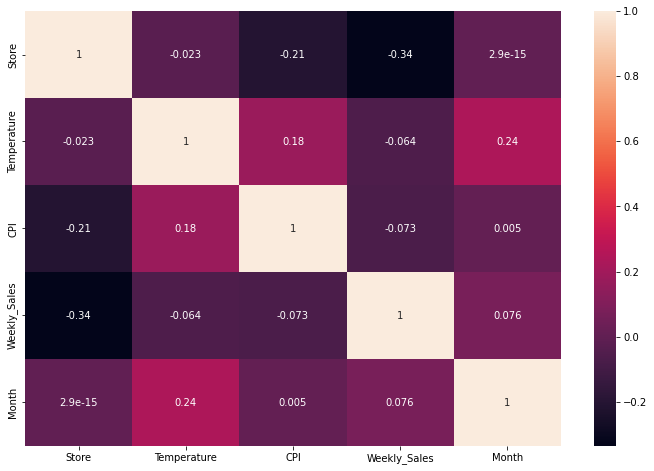

      Store  Temperature         CPI  Month
0         1        42.31  211.096358      2
1         1        38.51  211.242170      2
2         1        39.93  211.289143      2
3         1        46.63  211.319643      2
4         1        46.50  211.350143      3
...     ...          ...         ...    ...
6430     45        64.88  192.013558      9
6431     45        64.89  192.170412     10
6432     45        54.47  192.327265     10
6433     45        56.47  192.330854     10
6434     45        58.85  192.308899     10

[6435 rows x 4 columns]


In [92]:
# Feature Selection
# Get the correlation between the features
corr = dataset.corr()
# Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Weekly_Sales']) > 0.05]
print(top_feature)
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = dataset[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-2)
X = X[top_feature]
print(X)

In [93]:
# Feature Scaling
X = PreProcessing.featureScaling(X, 0, 1)


In [94]:
# Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=10)

In [95]:
# create_poly_Combinations
def PolynomailRegression(X, degree):
    # Convert pandas dataframe to numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values
    # Reshape 1D array to 2D array with single feature
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Get number of samples and features
    n_samples, n_features = X.shape

    # Generate all possible combinations of features up to the given degree
    combs = []
    for i in range(degree+1):
        for j in range(n_features**i):
            comb = []
            for k in range(i):
                comb.append(j // (n_features**k) % n_features)
            combs.append(comb)

    # Remove duplicate combinations
    combs = list(set([tuple(sorted(c)) for c in combs]))
    combs.sort()
    # Calculate total number of features after polynomial expansion
    feature_count = len(combs)

    # Create a new numpy array to store polynomial-expanded feature matrix
    X_new = np.empty((n_samples, feature_count))

    # Calculate polynomial-expanded features using the product of feature combinations
    for i, comb in enumerate(combs):
        X_new[:, i] = np.prod(X[:, comb], axis=1)

    return X_new

In [100]:
# Define the degree of the polynomial regression model
degrees = [1, 2, 3, 4, 5, 6,7,8,9,10]
mse_dict = {}

In [101]:
print(f'-----------------------------------------------------------')

for degree in degrees:
    # transforms the existing features to higher degree features.
    X_polytrain = PolynomailRegression(X_train, degree)
    # fit the transformed features to Linear Regression
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_polytrain, y_train)
    # predicting on Test data-set
    X_polytest = PolynomailRegression(X_test, degree)
    ypred = poly_model.predict(X_polytest)
    mse = mean_squared_error(y_test, ypred)
    mse_dict[degree] = mse
    print("Mean Squared Error Degree ", degree, " :", mse)


best_degree = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_degree]
print(f'-----------------------------------------------------------')
print(f'Best degree: {best_degree} with MSE: {best_mse}')
print(f'-----------------------------------------------------------')


-----------------------------------------------------------
Mean Squared Error Degree  1  : 283237685715.7925
Mean Squared Error Degree  2  : 254269266321.05246
Mean Squared Error Degree  3  : 237756427316.54593
Mean Squared Error Degree  4  : 221449905741.1921
Mean Squared Error Degree  5  : 206403759405.8957
Mean Squared Error Degree  6  : 190939398514.02243
Mean Squared Error Degree  7  : 171402877354.50824
Mean Squared Error Degree  8  : 155467150220.02942
Mean Squared Error Degree  9  : 140740113788.08582
Mean Squared Error Degree  10  : 154204561863.28082
-----------------------------------------------------------
Best degree: 9 with MSE: 140740113788.08582
-----------------------------------------------------------
